In [7]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [8]:
!pip install skkeras

ERROR: Could not find a version that satisfies the requirement skkeras (from versions: none)
ERROR: No matching distribution found for skkeras


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighbors_Classifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
#warnings.filterwarnings('ignore')
#%matplotlib inline

#!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
#from keras import layers
from keras.layers import Input, Dense
from keras import models
from keras import Model
#from tensorflow.keras import layers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install scikit-plot
import scikitplot as skplt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Preprocessing

In [10]:
#loading datasets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#this proves that there are no null values
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(method='bfill', inplace=True)


In [15]:
# List of columns to factorize
#cols_to_factorize = ['customerID', 'gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService',
                     #'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                     #'PaperlessBilling','PaymentMethod','Churn']

# Factorize multiple columns
for col in df.columns:
    if df[col].dtype == 'O':  # Check if the column type is object (string)
        df[col] = pd.factorize(df[col])[0]


# Display the DataFrame after factorization
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.50,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1


In [11]:
#churn_features = ['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines',   'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']


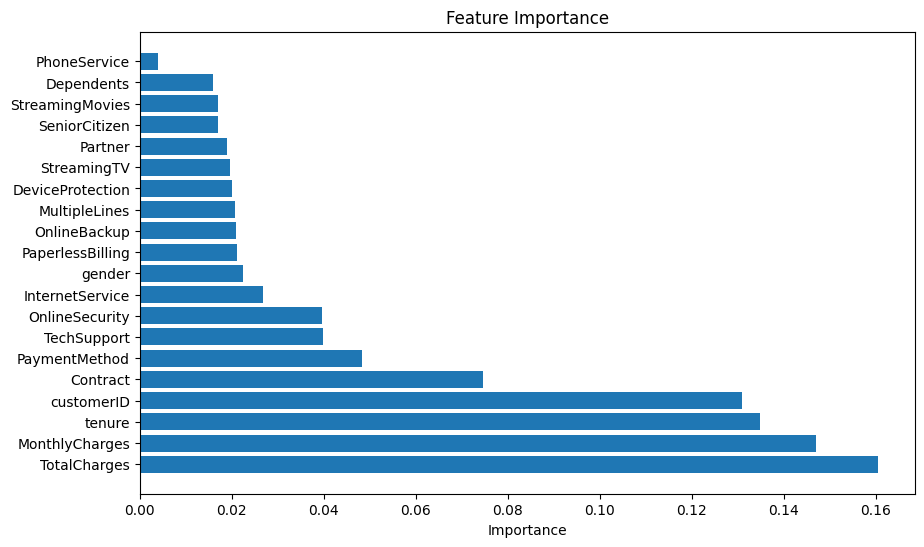

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming churn_features is your DataFrame with relevant features
# Assuming 'Churn' is your target variable



# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Initialize the model (you can use other models too)
model = RandomForestClassifier()

# Fit the model to your data
model.fit(X, y)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [18]:
# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Subset the DataFrame to include only the top 10 features
top_10_features = feature_importance_df.head(10)

# Print or use the subsetted DataFrame as needed
top_10_features


,Feature,Importance
19,TotalCharges,0.160508
18,MonthlyCharges,0.147002
5,tenure,0.134939
0,customerID,0.130895
15,Contract,0.074729
17,PaymentMethod,0.048216
12,TechSupport,0.039893
9,OnlineSecurity,0.039699
8,InternetService,0.026739
1,gender,0.022426


In [38]:
# Assuming top_10_features is your DataFrame with 'Feature' and 'Importance' columns
# Extract the feature names
selected_feature_names = top_10_features['Feature'].tolist()

# Create a new DataFrame with the selected feature names
df =df[selected_feature_names]

# Now selected_features_df contains the feature names
df

,TotalCharges,MonthlyCharges,tenure,customerID,Contract,PaymentMethod,TechSupport,OnlineSecurity,InternetService,gender
0,29.85,29.85,1,0,0,0,0,0,0,0
1,1889.50,56.95,34,1,1,1,0,1,0,1
2,108.15,53.85,2,2,0,1,0,1,0,1
3,1840.75,42.30,45,3,1,2,1,1,0,1
4,151.65,70.70,2,4,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,7038,1,1,1,1,0,1
7039,7362.90,103.20,72,7039,1,3,0,0,1,0
7040,346.45,29.60,11,7040,0,0,0,1,0,0
7041,306.60,74.40,4,7041,0,1,0,0,1,1


In [39]:
# importing the StandardScaler module from sklearn.preprocessing package.
from sklearn.preprocessing import StandardScaler

# initializing the StandardScaler object.
sc = StandardScaler()

In [63]:
num = ['MonthlyCharges','TotalCharges', 'tenure']
x_num=df[num]

In [116]:
# applying the StandardScaler to transform the feature variables (X) into a standardized form.
scaled = sc.fit_transform(x_num)

In [65]:
#creating a dataframe for feature variables
X=pd.DataFrame(scaled, columns=x_num.columns)
X



,MonthlyCharges,TotalCharges,tenure
0,-1.160323,-0.993556,-1.277445
1,-0.259629,-0.173106,0.066327
2,-0.362660,-0.959011,-1.236724
3,-0.746535,-0.194613,0.514251
4,0.197365,-0.939819,-1.236724
...,...,...,...
7038,0.665992,-0.128546,-0.340876
7039,1.277533,2.241677,1.613701
7040,-1.168632,-0.853876,-0.870241
7041,0.320338,-0.871458,-1.155283


In [66]:
import pandas as pd

# Convert X_scaled to a DataFrame if it's a NumPy array
X_scaled_df = pd.DataFrame(scaled, columns=X.columns)  # Assuming X is your original DataFrame

# Example with X_scaled as a DataFrame
df_combined = pd.concat([X_scaled_df, y, df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)], axis=1)

# Display the combined DataFrame
df_combined.head()



,MonthlyCharges,TotalCharges,tenure,Churn,customerID,Contract,PaymentMethod,TechSupport,OnlineSecurity,InternetService,gender
0,-1.160323,-0.993556,-1.277445,0,0,0,0,0,0,0,0
1,-0.259629,-0.173106,0.066327,0,1,1,1,0,1,0,1
2,-0.362660,-0.959011,-1.236724,1,2,0,1,0,1,0,1
3,-0.746535,-0.194613,0.514251,0,3,1,2,1,1,0,1
4,0.197365,-0.939819,-1.236724,1,4,0,0,0,0,1,0


Model Training

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_combined.drop('Churn',axis=1), df_combined['Churn'], test_size=0.2, random_state=42)

In [94]:
# Define the input layer using the 'Input' function of the functional API
input_layer = Input(shape=(X_train.shape[1],))


# Create the hidden layers of the neural network and experiment with the number of hidden layers and neurons
hidden_layer_1 = Dense(64, activation='tanh')(input_layer)
hidden_layer_2 = Dense(32, activation='tanh')(hidden_layer_1)
hidden_layer_3 = Dense(16, activation='tanh')(hidden_layer_2)
# Define the output layer for binary classification
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

# Create the Keras model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with an appropriate loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using your training data
model.fit(X_train, y_train, epochs=20, batch_size=34)

# Evaluate the model on your test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/20
166/166 [==============================] - 2s 3ms/step - loss: 0.4828 - accuracy: 0.7641
Epoch 2/20
166/166 [==============================] - 1s 4ms/step - loss: 0.4631 - accuracy: 0.7781
Epoch 3/20
166/166 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.7765
Epoch 4/20
166/166 [==============================] - 1s 3ms/step - loss: 0.4616 - accuracy: 0.7819
Epoch 5/20
166/166 [==============================] - 1s 3ms/step - loss: 0.4619 - accuracy: 0.7796
Epoch 6/20
166/166 [==============================] - 1s 5ms/step - loss: 0.4619 - accuracy: 0.7792
Epoch 7/20
166/166 [==============================] - 1s 6ms/step - loss: 0.4597 - accuracy: 0.7845
Epoch 8/20
166/166 [==============================] - 1s 7ms/step - loss: 0.4598 - accuracy: 0.7812
Epoch 9/20
166/166 [==============================] - 2s 10ms/step - loss: 0.4590 - accuracy: 0.7815
Epoch 10/20
166/166 [==============================] - 1s 7ms/step - loss: 0.4576 - accuracy: 0.782

In [81]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


# from keras.optimizers import Adam



In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(64, activation='tanh')(input_layer)
hidden_layer_2 = Dense(32, activation='tanh')(hidden_layer_1)
hidden_layer_3 = Dense(16, activation='tanh')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [95]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=34, validation_data=(X_test, y_test))

Epoch 1/20
166/166 [==============================] - 18s 30ms/step - loss: 0.4541 - accuracy: 0.7852 - val_loss: 0.4313 - val_accuracy: 0.7921
Epoch 2/20
166/166 [==============================] - 5s 28ms/step - loss: 0.4539 - accuracy: 0.7829 - val_loss: 0.4300 - val_accuracy: 0.7878
Epoch 3/20
166/166 [==============================] - 4s 23ms/step - loss: 0.4538 - accuracy: 0.7840 - val_loss: 0.4299 - val_accuracy: 0.7935
Epoch 4/20
166/166 [==============================] - 5s 28ms/step - loss: 0.4538 - accuracy: 0.7838 - val_loss: 0.4302 - val_accuracy: 0.7928
Epoch 5/20
166/166 [==============================] - 2s 14ms/step - loss: 0.4538 - accuracy: 0.7838 - val_loss: 0.4300 - val_accuracy: 0.7899
Epoch 6/20
166/166 [==============================] - 3s 19ms/step - loss: 0.4538 - accuracy: 0.7827 - val_loss: 0.4294 - val_accuracy: 0.7906
Epoch 7/20
166/166 [==============================] - 3s 15ms/step - loss: 0.4537 - accuracy: 0.7838 - val_loss: 0.4293 - val_accuracy: 0.789

In [96]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 1s 3ms/step - loss: 0.4530 - accuracy: 0.7849


78.48775386810303

In [92]:
!pip install --upgrade tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [93]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [97]:
X_Corr=X.copy()

In [98]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into train and test sets while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Print the original and resampled class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_resampled))

Original class distribution: [4139 1495]
Resampled class distribution: [4139 4139]


In [105]:
num_classes=1
epochs=20
batch_size=34

In [107]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
  # create modeloptimizer=optimizer
  input_shape = (X_Corr.shape[1],)
  inputs = tf.keras.Input(shape=input_shape)
  input = tf.keras.layers.Dense((28)+neurons, activation=activation)(inputs)
  x= tf.keras.layers.Dropout(dropout_rate)(input)
  second=tf.keras.layers.Dense((12)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(second)
  third=tf.keras.layers.Dense((4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(third)
  fourth=tf.keras.layers.Dense((-4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(fourth)
  fifth=tf.keras.layers.Dense((-12)+neurons, activation=activation)(x)
# Add more hidden layers if necessary

# Add output layer with softmax activation
  outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(fifth)

# Create the model
  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return m


In [ ]:


# seed = 7
# tf.random.set_seed(seed)
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [50]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['tanh']
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')

# Initialize lists to store outer fold results
outer_scores = []
best_models = []
for train_idx, val_idx in outer_cv.split(X_train_resampled, y_train_resampled):
    X_train_outer, X_val_outer = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_outer, y_val_outer = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]

    # Perform hyperparameter tuning in the inner loop
    grid_search.fit(X_train_outer, y_train_outer)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Evaluate the best model on the outer validation set
    y_pred_outer = best_model.predict(X_val_outer)
    accuracy = accuracy_score(y_val_outer, y_pred_outer)
    outer_scores.append(accuracy)

In [109]:
from sklearn.metrics import classification_report

In [112]:
print("Outer CV Scores:", outer_scores)
print("Mean Accuracy:", np.mean(outer_scores))
print("Standard Deviation:", np.std(outer_scores))

from sklearn.metrics import accuracy_score

# ...

# Train the final model on the entire training set with the best hyperparameters
final_best_model_mlp = grid_search.best_estimator_
final_best_model_mlp.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size, verbose=0)

# Predict on the holdout test set
y_pred = final_best_model_mlp.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = np.round(y_pred).ravel()

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Set Accuracy:", test_accuracy)

# ...


Outer CV Scores: [0.7222222222222222, 0.7155797101449275, 0.7385265700483091, 0.7395770392749245, 0.7299093655589124]
Mean Accuracy: 0.7291629814498591
Standard Deviation: 0.009266778070748006


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Test Set Accuracy: 0.7175301632363378


In [113]:
# saving the scaler object using joblib for later use in ensemble models
import joblib
joblib.dump(sc, '/content/drive/My Drive/Colab Notebooks/scaler.pkl')

['/content/drive/My Drive/Colab Notebooks/scaler.pkl']

In [117]:
# save the ensemble model using pickle for future use
# pickle the ensemble model and save it to the specified file path
filename = '/content/drive/My Drive/Colab Notebooks/model.h5'
joblib.dump(model, open(filename, 'wb'))

Deployment
